In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
import pickle

In [2]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
plt.rcParams["font.size"] = 16

In [3]:
with open('../data/z_limit.pickle', 'rb') as handle:
    history = pickle.load(handle)

In [4]:
def get_P_EE_from_history(history):
    P_EEs = []

    for _h in history:
        P_EEs.append(_h["P_EE"])

    P_EE_arr = np.concatenate(P_EEs).reshape(-1, 3)
    
    return P_EE_arr

def get_cbf_from_history(history):
    cbfs = []

    for _h in history:
        cbfs.append(_h["cbf"])

    cbfs_arr = np.concatenate(cbfs)
    
    return cbfs_arr

def get_dcbf_from_history(history):
    dcbfs = []

    for _h in history:
        dcbfs.append(_h["dcbf"])

    dcbfs_arr = np.concatenate(dcbfs)
    
    return dcbfs_arr

def get_controls_from_history(history):
    controls = []

    for _h in history:
        controls.append(_h["τ_cbf"])

    controls_arr = np.concatenate(controls).reshape(-1, 9)
    
    return controls_arr

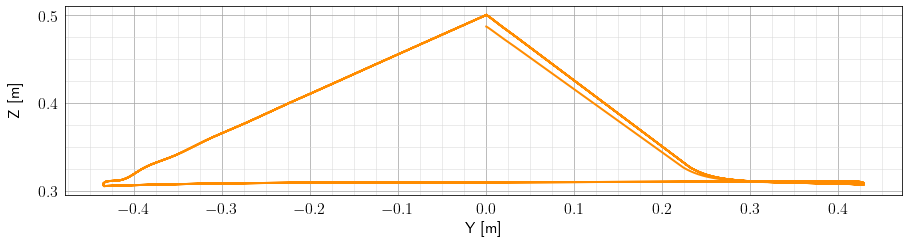

In [5]:
P_EE_arr = get_P_EE_from_history(history)
cbf_arr = get_cbf_from_history(history)
dcbf_arr = get_dcbf_from_history(history)
controls_arr = get_controls_from_history(history)

fig, ax = plt.subplots(1, 1, figsize=(15, 8))

ax.plot(P_EE_arr[:, 1], P_EE_arr[:, 2], color="darkorange", linewidth=2)
ax.set_aspect("equal")
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(MultipleLocator(0.025))
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.025))
ax.grid(True, "minor", color="0.85", linewidth=0.50, zorder=-20)
ax.grid(True, "major", color="0.65", linewidth=0.75, zorder=-10)
ax.tick_params(which="both", bottom=False, left=False)

ax.set_xlabel("Y [m]")
ax.set_ylabel("Z [m]")
ax.yaxis.set_label_coords(-0.05, 0.5)

plt.show()

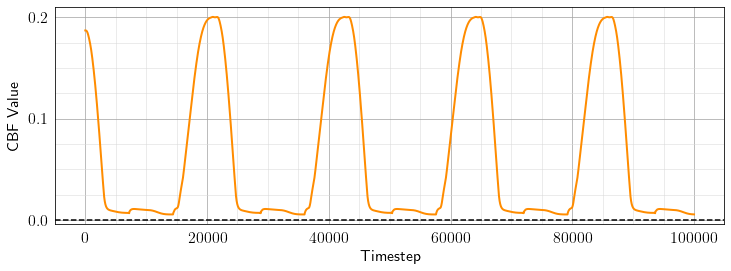

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

ax.plot(cbf_arr, color="darkorange", linewidth=2)
ax.axhline(0.0, color="black", linestyle="dashed", linewidth=1.5)
ax.xaxis.set_major_locator(MultipleLocator(20000))
ax.xaxis.set_minor_locator(MultipleLocator(5000))
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.025))
ax.grid(True, "minor", color="0.85", linewidth=0.50, zorder=-20)
ax.grid(True, "major", color="0.65", linewidth=0.75, zorder=-10)
ax.tick_params(which="both", bottom=False, left=False)

ax.set_xlabel("Timestep")
ax.set_ylabel("CBF Value")
ax.yaxis.set_label_coords(-0.05, 0.5)

plt.show()

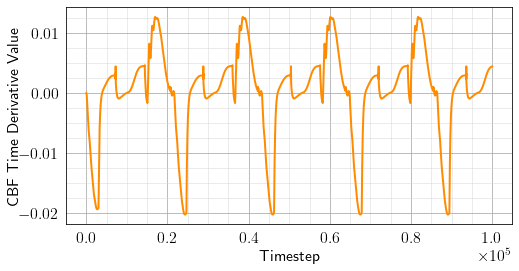

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(dcbf_arr, color="darkorange", linewidth=2)
ax.xaxis.set_major_locator(MultipleLocator(20000))
ax.xaxis.set_minor_locator(MultipleLocator(5000))
ax.yaxis.set_major_locator(MultipleLocator(0.01))
ax.yaxis.set_minor_locator(MultipleLocator(0.0025))
ax.grid(True, "minor", color="0.85", linewidth=0.50, zorder=-20)
ax.grid(True, "major", color="0.65", linewidth=0.75, zorder=-10)
ax.tick_params(which="both", bottom=False, left=False)
ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

ax.set_xlabel("Timestep")
ax.set_ylabel("CBF Time Derivative Value")
ax.yaxis.set_label_coords(-0.1, 0.5)

plt.show()

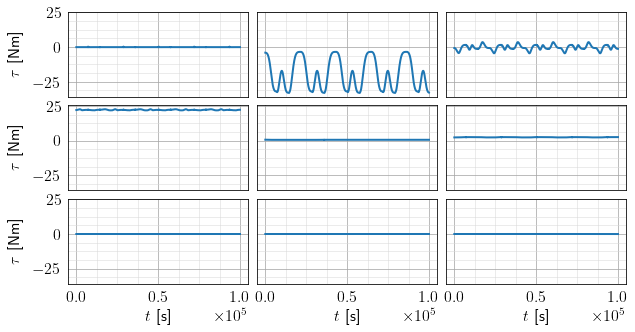

In [8]:
fig, axs = plt.subplots(3, 3, figsize=(10, 5), sharex=True, sharey=True)
count = 0

for i in range(3):
    for j in range(3):
        axs[i, j].plot(controls_arr[:, count], linewidth=2)
        axs[i, j].xaxis.set_major_locator(MultipleLocator(50000))
        axs[i, j].xaxis.set_minor_locator(MultipleLocator(12500))
        axs[i, j].yaxis.set_major_locator(MultipleLocator(25))
        axs[i, j].yaxis.set_minor_locator(MultipleLocator(25/4))
        axs[i, j].grid(True, "minor", color="0.85", linewidth=0.50, zorder=-20)
        axs[i, j].grid(True, "major", color="0.65", linewidth=0.75, zorder=-10)
        axs[i, j].tick_params(which="both", bottom=False, left=False)
        count += 1
        
        if i == 2:
            axs[i, j].ticklabel_format(axis='x', style='sci', scilimits=(0,0))
            axs[i, j].set_xlabel(r"$t$ [s]")
        
        if j == 0:
            axs[i, j].set_ylabel(r"$\tau$ [Nm]")
            axs[i, j].yaxis.set_label_coords(-0.25, 0.5)

plt.subplots_adjust(wspace=0.05, hspace=0.1)

In [22]:
with open('../data/y_limit.pickle', 'rb') as handle:
    history = pickle.load(handle)

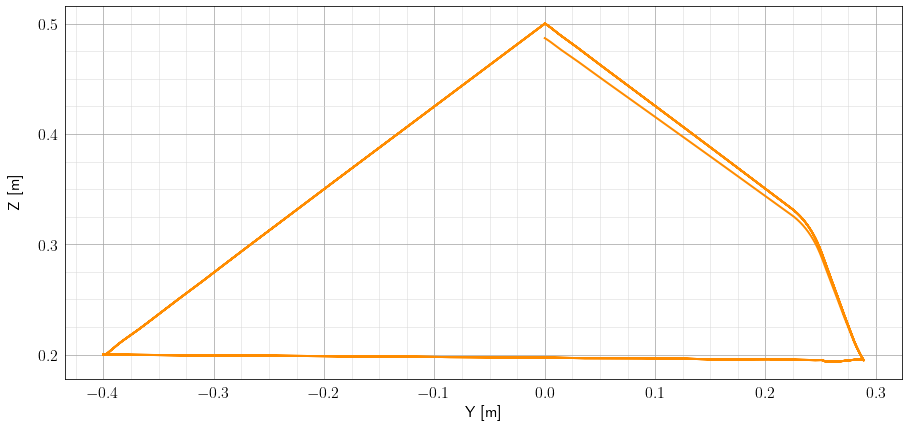

In [23]:
P_EE_arr = get_P_EE_from_history(history)
cbf_arr = get_cbf_from_history(history)

fig, ax = plt.subplots(1, 1, figsize=(15, 8))

ax.plot(P_EE_arr[:, 1], P_EE_arr[:, 2], color="darkorange", linewidth=2)
ax.set_aspect("equal")
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(MultipleLocator(0.025))
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.025))
ax.grid(True, "minor", color="0.85", linewidth=0.50, zorder=-20)
ax.grid(True, "major", color="0.65", linewidth=0.75, zorder=-10)
ax.tick_params(which="both", bottom=False, left=False)

ax.set_xlabel("Y [m]")
ax.set_ylabel("Z [m]")
ax.yaxis.set_label_coords(-0.05, 0.5)

plt.show()

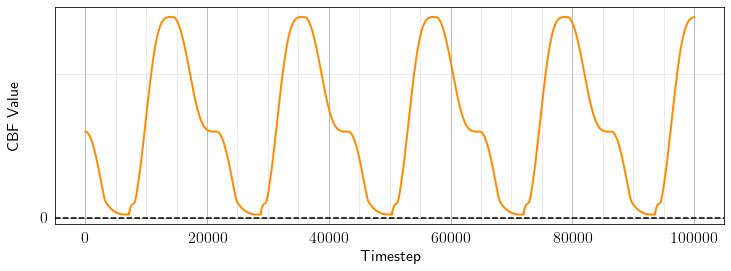

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

ax.plot(cbf_arr, color="darkorange", linewidth=2)
ax.axhline(0.0, color="black", linestyle="dashed", linewidth=1.5)
ax.xaxis.set_major_locator(MultipleLocator(20000))
ax.xaxis.set_minor_locator(MultipleLocator(5000))
ax.yaxis.set_major_locator(MultipleLocator(2.0))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.grid(True, "minor", color="0.85", linewidth=0.50, zorder=-20)
ax.grid(True, "major", color="0.65", linewidth=0.75, zorder=-10)
ax.tick_params(which="both", bottom=False, left=False)

ax.set_xlabel("Timestep")
ax.set_ylabel("CBF Value")
ax.yaxis.set_label_coords(-0.05, 0.5)

plt.show()